# COMM 4P35 - Web Archives Tutorial


## Part 1 - Analyzing changes to Canada.ca pages

This notebook uses a subset of the the data from the [COVID in Niagara Archive](https://archive-it.org/collections/13781). We'll use Google Collab to explore how some pages from the [canada.ca](https://canada.ca) domain have changed during the course of the pandemic.


In [1]:
# Loading in the the pieces

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

from textblob import TextBlob
import nltk


import difflib
from IPython import display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
%matplotlib inline

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias fo

### Step 1.

We'll load up the CSV file of data that represents our crawls of the canada.ca pages. We'll add some extra processing:

- We calculate the length of each entry, and add as a new column
- We calculate the sentiment of each entry, and as two new columns

and randomly display one row of this spreadsheet.

In [2]:

#Open up the CSV file fo data
web_page_text = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/snap_shot_canada_ca.csv")


#Make sure the date column is treated as a Date
web_page_text['crawl_date']= pd.to_datetime(web_page_text['crawl_date'],format='%Y%m%d')


#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in web_page_text.iterrows():
    web_page_text.at[index, "length"] = len(web_page_text.at[index,"content"])
    
    
    
##add two extra columns to the date that shows the calculated 'sentiment' of the entries

polarity = []
subjectivity = []


for entry in web_page_text.content:
    #print(day,"\n")
    score = TextBlob(entry)
    polarity.append(score.sentiment.polarity)
    subjectivity.append(score.sentiment.subjectivity)
    
web_page_text['polarity'] = polarity
web_page_text['subjectivity'] = subjectivity

    
    
    
# A random 'sample' of 1 record
web_page_text.sample(1)

crawl_date     domain  \
263 2020-07-31  canada.ca   

                                                                                                                                            url  \
263  https://www.canada.ca/en/department-finance/news/2020/03/canadas-covid-19-economic-response-plan-support-for-canadians-and-businesses.html   

    mime_type_web_server mime_type_tika language  \
263  text/html            text/html      en        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [3]:
print("Total number of web pages captures in this archive subset: " + str(len(web_page_text)))

Total number of web pages captures in this archive subset: 1345


## Step 2 

Let's look at how many times the top 25 URLs in this archive have been crawled. 

In [4]:
web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

,crawl_date,domain,mime_type_web_server,mime_type_tika,language,content,length,polarity,subjectivity
url,,,,,,,,,
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html,71,71,71,71,71,71,71,71,71
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html,70,70,70,70,70,70,70,70,70
https://www.canada.ca/en/department-finance/economic-response-plan.html,69,69,69,69,69,69,69,69,69
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/symptoms.html,68,68,68,68,68,68,68,68,68
https://www.canada.ca/en.html,68,68,68,68,68,68,68,68,68
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks.html,66,66,66,66,66,66,66,66,66
https://www.canada.ca/en/department-finance/news/2020/03/canadas-covid-19-economic-response-plan-support-for-canadians-and-businesses.html,66,66,66,66,66,66,66,66,66
https://www.canada.ca/en/crown-indigenous-relations-northern-affairs.html,65,65,65,65,65,65,65,65,65
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html?utm_campaign=not-applicable&utm_medium=vanity-url&utm_source=canada-ca_covid-19,55,55,55,55,55,55,55,55,55


## Step 3

Let's look at a specific URL... We set it in the next cell

In [5]:
URL = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html"

... with that set, let's plot out the change in content length of that page

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


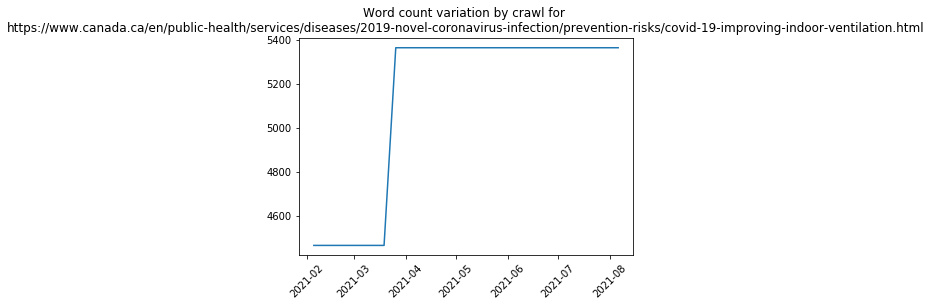

In [6]:
url_data = web_page_text[web_page_text['url'] == URL].sort_values(by="crawl_date")

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + URL)
plt.show()


### Step 4

Curious. We see a changes in the page length. Let's open up each of the versions of this page on the Internet Archive and see if we can spot the difference in the pages.

In [64]:
#for item in url_data.groupby("length").first():
#    print(ite

unique_days = url_data.groupby("length").first().sort_values(by='crawl_date')
print("\n")
for index, row in unique_days.iterrows():
    date = str(row['crawl_date']).split(' ')[0].replace('-','')
    length = len(row['content'])
    print("Date of crawl: ",date, ". Length of page: ",length)
    print("View on Internet archive https://web.archive.org/web/" + date + "/" + URL)
    print("\n")



Date of crawl:  20210205 . Length of page:  4465
View on Internet archive https://web.archive.org/web/20210205/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html


Date of crawl:  20210326 . Length of page:  5363
View on Internet archive https://web.archive.org/web/20210326/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html




### Step 5 - Graphing Changes in Sentiment

Let's map out the changes in sentiment scores for all of the capture dates for this URL.


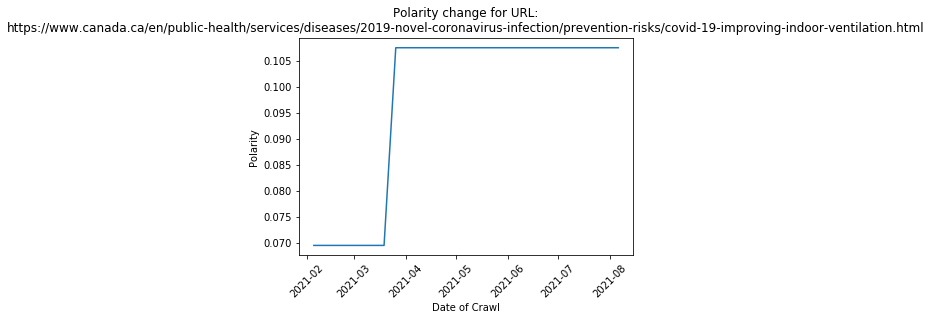

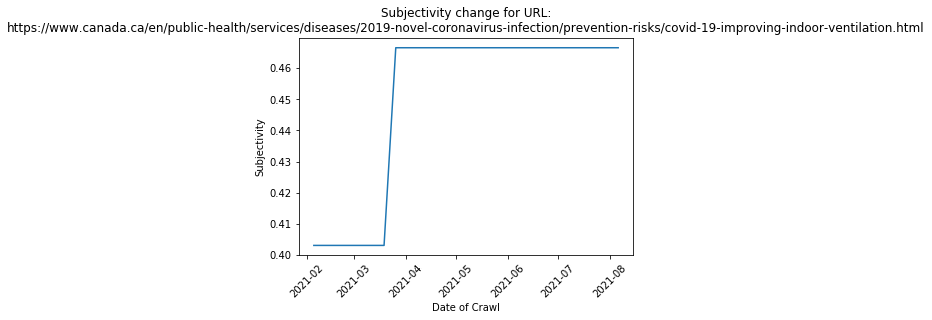

In [56]:
plt.plot(url_data['crawl_date'],url_data['polarity'])
plt.xticks(rotation=45)
plt.title("Polarity change for URL:\n"+URL)
plt.ylabel("Polarity")
plt.xlabel("Date of Crawl")
plt.show()


plt.plot(url_data['crawl_date'],url_data['subjectivity'])
plt.xticks(rotation=45)
plt.title("Subjectivity change for URL:\n"+URL)
plt.ylabel("Subjectivity")
plt.xlabel("Date of Crawl")
plt.show()


## Part 2 - Run your own analysis

We'll now look at a selection of pages from a different domain in that dataset. Here we will use [ontario.ca](https://ontario.ca)


In [7]:
P2_web_page_text = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/snap_shot_ontario_ca.csv")
P2_web_page_text.dropna(inplace=True)

In [8]:
P2_web_page_text['crawl_date']= pd.to_datetime(P2_web_page_text['crawl_date'],format='%Y%m%d')
#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in P2_web_page_text.iterrows():
    P2_web_page_text.at[index, "length"] = len(P2_web_page_text.at[index,"content"])
    
P2_web_page_text.sample(1)

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,length
468,2020-08-21,ontario.ca,https://www.ontario.ca/page/emergency-information,text/html,text/html,fr,"COVID-19 : Obtenez les plus récentes mises à jour, faites une autoévaluation ou renseignez-vous sur Alerte COVID, l’application d’avis d’exposition à la COVID-19. COVID-19: Get the latest updates, take a self-assessment or learn about the COVID Alert exposure-notification app. JavaScript is required to view this site Ontario.ca needs JavaScript to function properly and provide you with a fast, stable experience. To have a better experience, you need to: Go to your browser's settings Enable JavaScript JavaScript est nécessaire pour ce site Le site Ontario.ca exige JavaScript pour fonctionner comme il faut, avec rapidité et stabilité. Pour avoir une meilleure expérience, vous devez : Accéder aux paramètres de votre navigateur Activer JavaScript {{ 'Skip to main content' | translate }} {{ 'Skip to main content' | translate }} You are using an outdated browser that is no longer supported by Ontario.ca. Outdated browsers lack safety features that keep your information secure, and they can also be slow. Learn about the browsers we support. Vous utilisez un navigateur désuet qui n’est plus accepté par Ontario.ca. Les navigateurs désuets ne disposent pas de caractéristiques sécuritaires permettant d’assurer la sécurité de vos renseignements. En savoir plus sur les navigateurs que nous supportons.",1309.0


Top 25 URLs crawled in this Archive

In [9]:
P2_web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

,crawl_date,domain,mime_type_web_server,mime_type_tika,language,content,length
url,,,,,,,
https://www.ontario.ca/page/covid-19-response-framework-keeping-ontario-safe-and-open,28,28,28,28,28,28,28
https://www.ontario.ca/page/emergency-information,27,27,27,27,27,27,27
https://www.ontario.ca/laws/,22,22,22,22,22,22,22
https://www.ontario.ca/,21,21,21,21,21,21,21
https://www.ontario.ca/page/how-ontario-is-responding-covid-19,19,19,19,19,19,19,19
https://www.ontario.ca/laws/regulation/200082,19,19,19,19,19,19,19
https://www.ontario.ca/page/reopening-ontario,16,16,16,16,16,16,16
https://www.ontario.ca/page/ethical-framework-covid-19-vaccine-distribution,10,10,10,10,10,10,10
https://www.ontario.ca/page/enhancing-public-health-and-workplace-safety-measures-provincewide-shutdown,10,10,10,10,10,10,10


Try to find and interesting URL in the list you just created that shows some changes in page length. You can experiment by setting the `P2_URL` variable in the next cell to that URL.

In [13]:
P2_URL = "https://www.ontario.ca/page/covid-19-response-framework-keeping-ontario-safe-and-open"

now run the next cell to perform the analysis.

Analysis for:  https://www.ontario.ca/page/covid-19-response-framework-keeping-ontario-safe-and-open 

Date of crawl:  20201113
Length of page:  1309
Polarity:  0.08333333333333333
Subjectivity 0.5033333333333334
View on Internet archive https://web.archive.org/web/20201113/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html


Date of crawl:  20201225
Length of page:  1392
Polarity:  0.033333333333333305
Subjectivity 0.42000000000000004
View on Internet archive https://web.archive.org/web/20201225/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html


Date of crawl:  20210115
Length of page:  1330
Polarity:  0.030303030303030276
Subjectivity 0.4090909090909091
View on Internet archive https://web.archive.org/web/20210115/https://www.canada.ca/en/public-health/services/diseases/2019-novel-corona

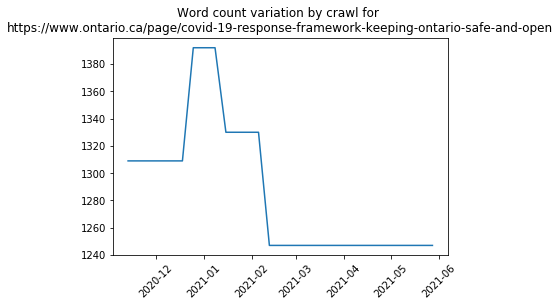

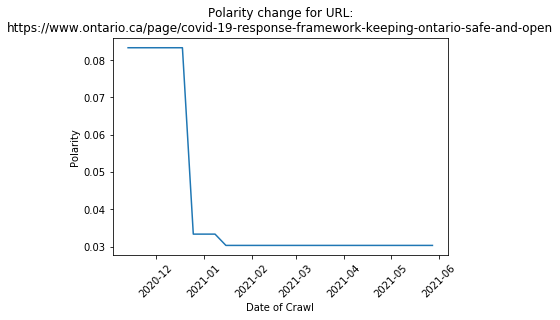

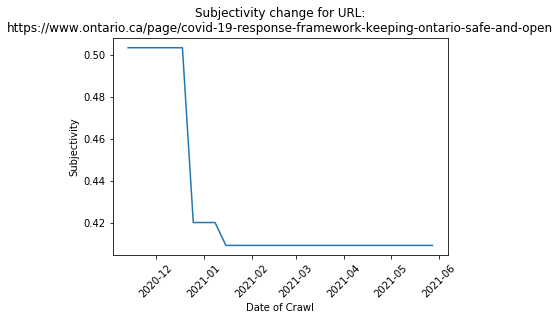

In [69]:
P2_url_data = P2_web_page_text[P2_web_page_text['url'] == P2_URL].sort_values(by="crawl_date")

#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in P2_url_data.iterrows():
    P2_url_data.at[index, "length"] = len(P2_url_data.at[index,"content"])

#Add two extra columns for sentiment scores
P2_polarity = []
P2_subjectivity = []

for entry in P2_url_data.content:
    #print(day,"\n")
    score = TextBlob(entry)
    P2_polarity.append(score.sentiment.polarity)
    P2_subjectivity.append(score.sentiment.subjectivity)
    
P2_url_data['polarity'] = P2_polarity
P2_url_data['subjectivity'] = P2_subjectivity


print("Analysis for: ",P2_URL,"\n")

#Find all changes in page length for this URL

P2_unique_days = P2_url_data.groupby("length").first().sort_values(by='crawl_date')

for index, row in P2_unique_days.iterrows():
    date = str(row['crawl_date']).split(' ')[0].replace('-','')
    print("Date of crawl: ",date)
    print("Length of page: ",len(row['content']))
    print("Polarity: ", row['polarity'])
    print("Subjectivity",row['subjectivity'])
    print("View on Internet archive https://web.archive.org/web/" + date + "/" + URL)
    print("\n")

#Graph Sentiment

#Plot out Word counts of crawls
plt.plot(P2_url_data['crawl_date'],P2_url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + P2_URL)
plt.show()

plt.plot(P2_url_data['crawl_date'],P2_url_data['polarity'])
plt.xticks(rotation=45)
plt.title("Polarity change for URL:\n"+P2_URL)
plt.ylabel("Polarity")
plt.xlabel("Date of Crawl")
plt.show()

plt.plot(P2_url_data['crawl_date'],P2_url_data['subjectivity'])
plt.xticks(rotation=45)
plt.title("Subjectivity change for URL:\n"+P2_URL)
plt.ylabel("Subjectivity")
plt.xlabel("Date of Crawl")
plt.show()

Describe the changes you see in the page between the shortest and longest version